In [2]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


In [3]:
def get_data(filename):
    with open(filename) as training_file:
        csv_reader = csv.reader(training_file, delimiter=',')
        first_line = True
        temp_images = []
        temp_labels = []
        for row in csv_reader:
            if first_line:
                # print("Ignoring first line")
                first_line = False
            else:
                temp_labels.append(row[0])
                image_data = row[1:785]
                image_data_as_array = np.array_split(image_data, 28)
                temp_images.append(image_data_as_array)
        images = np.array(temp_images).astype('float')
        labels = np.array(temp_labels).astype('float')
    return images, labels


training_images, training_labels = get_data('sign-language-mnist/sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign-language-mnist/sign_mnist_test.csv')

print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)


(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [4]:
training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(
    rescale=1. / 255)

print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(26, activation=tf.nn.softmax)])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 26)               

In [0]:
model.compile(optimizer = tf.train.AdamOptimizer(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size=32),
                              steps_per_epoch=len(training_images) / 32,
                              epochs=15,
                              validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                              validation_steps=len(testing_images) / 32)

model.evaluate(testing_images, testing_labels)

Epoch 1/15
858/857 [==============================] - 10s 12ms/step - loss: 2.8310 - acc: 0.1450 - val_loss: 2.1455 - val_acc: 0.3083
Epoch 2/15
858/857 [==============================] - 10s 11ms/step - loss: 2.1264 - acc: 0.3308 - val_loss: 1.3369 - val_acc: 0.5538
Epoch 3/15
858/857 [==============================] - 9s 11ms/step - loss: 1.7890 - acc: 0.4256 - val_loss: 1.1187 - val_acc: 0.6223
Epoch 4/15
858/857 [==============================] - 10s 11ms/step - loss: 1.5630 - acc: 0.4965 - val_loss: 0.9661 - val_acc: 0.6677
Epoch 5/15
858/857 [==============================] - 10s 11ms/step - loss: 1.3960 - acc: 0.5416 - val_loss: 0.8516 - val_acc: 0.7037
Epoch 6/15
858/857 [==============================] - 10s 11ms/step - loss: 1.2758 - acc: 0.5805 - val_loss: 0.8253 - val_acc: 0.7255
Epoch 7/15
858/857 [==============================] - 10s 11ms/step - loss: 1.1885 - acc: 0.6055 - val_loss: 0.6579 - val_acc: 0.7684
Epoch 8/15
858/857 [==============================] - 10s 11ms/

[406.5865668803703, 0.45050195]

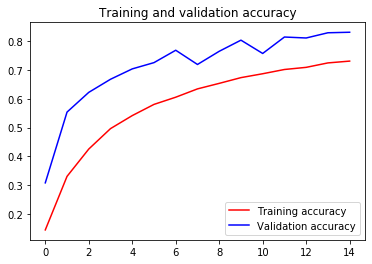

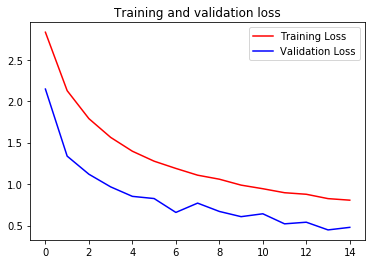

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()